# Basic Descriptions of the Data

In [1]:
import sys
sys.path.append('../bin')

import utils

graph = utils.load_graph()
types = graph.get_nodes()
categories = types['Category']
exhibitions = types['Exhibition']
artists = types['Artist']

### Total number of  vertices and edges:

In [2]:
print(f'verices: {graph.count_nodes()} edges: {graph.count_edges()}')

verices: 5904 edges: 27256


### Density

Density takes into account vertex types Exhibition, Artist and Category. It doesn't take into account artist-to-artist similarity. Exhibition and Category both link to Artist, but not to each other, resulting in a sparse graph.

In [3]:
graph.density()

0.0015641304981574295

### Number of movements, exhibitions and artists

In [4]:
print(f'categories: {len(categories)} exhibitions: {len(exhibitions)} artists: {len(artists)}')


categories: 111 exhibitions: 756 artists: 5037


### Distribution of degrees in node type Artist

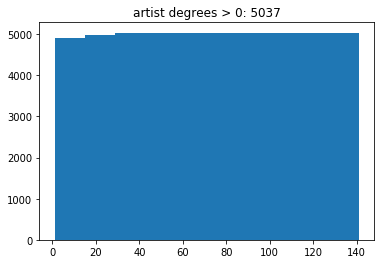

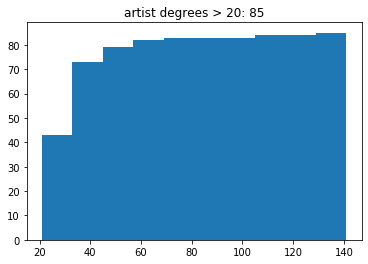

In [5]:
import matplotlib.pyplot as plt

X1 = [a.degrees for a in artists.values()]
X2 = [a.degrees for a in artists.values() if a.degrees > 20]

plt.title(f'artist degrees > 0: {len(X1)}')
plt.hist(X1, cumulative=True)
plt.show()

plt.title(f'artist degrees > 20: {len(X2)}')
plt.hist(X2, cumulative=True)
plt.show()

### Distribution of degrees in node type Exhibition

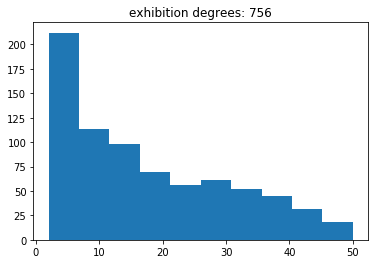

In [6]:
X3 = [x.degrees for x in exhibitions.values()]

plt.title(f'exhibition degrees: {len(X3)}')
plt.hist(X3)
plt.show()

### Distribution of degrees in node type Category

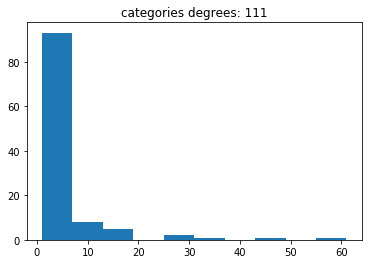

In [7]:
X3 = [x.degrees for x in categories.values()]

plt.title(f'categories degrees: {len(X3)}')
plt.hist(X3)
plt.show()

### Number of edges between artists

This should be 10 x artists

In [8]:
similars = []
for a in artists.values():
    for t, _x in a.similar:
        similars.append(t)
len(similars)

48760

In [9]:
# This could be drilled into a bit. Who is missing edges?
len(similars)/ len(artists)

9.680365296803654

### Labeled and unlabeled Artists

Labels were added for artists having `degrees > 2`.

In [10]:
labeled_artists = set()

for c in categories.values():
    for m in c.edges:
        labeled_artists.add(m)

artists_degree_gt_1 = set([a.id for a in artists.values() if a.degrees > 2])

unlabeled_artists = artists_degree_gt_1 ^ labeled_artists

print(f'Unlabeled: {len(unlabeled_artists)}')
print(f'Labeled: {len(labeled_artists)}')

print(f'Percent of labeled artists (with degrees > 2) {len(labeled_artists) / (len(unlabeled_artists) + len(labeled_artists))}')

Unlabeled: 597
Labeled: 415
Percent of labeled artists (with degrees > 2) 0.41007905138339923


In [11]:
def find_in_type(term, collection):
    for c in collection.values():
        if term in c.edges:
            print(f'{term} in {c.title}')


In [12]:
len(artists_degree_gt_1) == len(unlabeled_artists) + len(labeled_artists) 

True

In [13]:
{1,2,3,4} ^ {2,4} == {2,4} ^ {1,2,3,4}

True

In [14]:
{2,4} ^ {1,2,3,4}

{1, 3}

In [15]:
{1,2,3,4}.difference({2,4}) == {1,3}

True

In [16]:
{1,2,3,4}.difference({2,4}) == {2,4}.difference({1,2,3,4})

False